# Cormier model

$$ d X_t = - X_t dt + J \mathbb{E}[cos(X_t)] dt + \sqrt{2} d W_t, \quad X_0 = \xi \sim \operatorname{Unif}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import Algorithms_for_EDMD

In [2]:
def find_alphas(J, show_plots=False):
    xaxis=np.linspace(-30,30,1000)
    y1=np.sqrt(np.exp(1))/J*xaxis
    y2=np.cos(xaxis)
    idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
    
    if show_plots==True:
        plt.plot(xaxis, y1, '-')
        plt.plot(xaxis, y2, '-')
        plt.plot(xaxis[idx], y1[idx], 'ro')
        plt.show()
        print(xaxis[idx])
        
    return xaxis[idx]

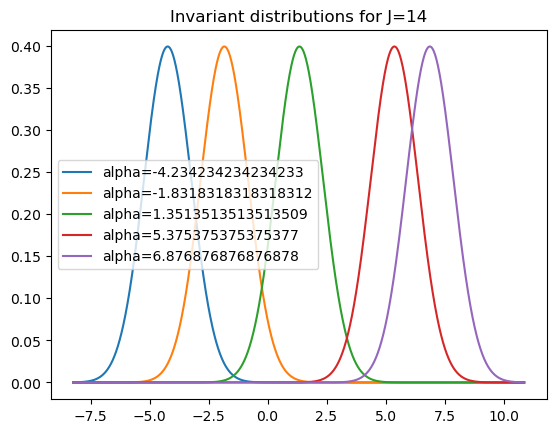

In [3]:
def invariant_distribution(J):
    
    alphas=find_alphas(J,show_plots=False)
        
    x_axis = np.arange(alphas[0]-4, alphas[-1]+4, 0.01)
    
    for i,alpha in enumerate(alphas):
        rho = np.exp(-0.5*(x_axis-alpha)**2)
        area = np.trapz(rho, dx=0.01)
        plt.plot(x_axis,1/area*rho, label=f'alpha={alpha}')
        y=1/area*rho
        
    plt.title(f'Invariant distributions for J={J}')
    plt.legend()
    
    
invariant_distribution(14)

In [5]:
def scheme_cormier(Dt,n,J,X0,dB,p,saveall=True):
    Xemt = X0 
    Meancos = np.ones((p,), dtype=float)*np.mean(np.cos(Xemt))
    Xem = []
    Xem.append(Xemt)
    for j in range(n):
        Xemt = Xemt + ( -Xemt + J*Meancos)* Dt  + np.sqrt(2)  * dB[j,:]
        Meancos = np.ones((p,), dtype=float)*np.mean(np.cos(Xemt))
        if saveall==True:
            Xem.append(Xemt)
    if saveall==False:
        Xem.append(Xemt)
    return Xem

def create_data(Dt,T,J,p,X0,seed=0):
    t = np.arange(Dt, T + Dt, Dt)
    n = len(t) 
    np.random.seed(seed)
    dB = np.sqrt(Dt) * np.random.randn(n,p)
    Xem=np.array(scheme_cormier(Dt,n,J,X0,dB,p,saveall=False))
    dataXem = Xem[0,:]
    dataYem = Xem[1,:]
    return dataXem, dataYem

def scheme_cormier_decoupled(mu,Dt,n,J,X0,dB,p,saveall=True):
    Xemt = X0 
    Meancos = np.ones((p,), dtype=float)*np.mean(np.cos(mu[0,:]))
    Xem = []
    Xem.append(Xemt)
    for j in range(n):
        Xemt = Xemt + ( -Xemt + J*Meancos)* Dt  + np.sqrt(2)  * dB[j,:]
        Meancos = np.ones((p,), dtype=float)*np.mean(np.cos(mu[j,:]))
        if saveall==True:
            Xem.append(Xemt)
    if saveall==False:
        Xem.append(Xemt)
    return Xem

def create_data_decoupled(Dt,T,J,p,X0,seed=0):
    t = np.arange(Dt, T + Dt, Dt)
    n = len(t)
    np.random.seed(seed)
    dB = np.sqrt(Dt) * np.random.randn(n,p)
    mu=np.array(scheme_cormier(Dt,n,J,X0,dB,p,saveall=True))
    dB1 = np.sqrt(Dt) * np.random.randn(n,p)
    Xem=scheme_cormier_decoupled(mu,Dt,n,J,X0,dB1,p,saveall=False)
    dataXem = Xem[0]
    dataYem = Xem[1]
    return dataXem, dataYem
    


In [6]:
# Set parameters
p=500000
Dt=0.01
T=0.5
J=14
X0=np.random.uniform(low=-11, high=11, size=p)

# Create data
dataX, dataY= create_data_decoupled(Dt,T,J,p,X0,seed=0)
    

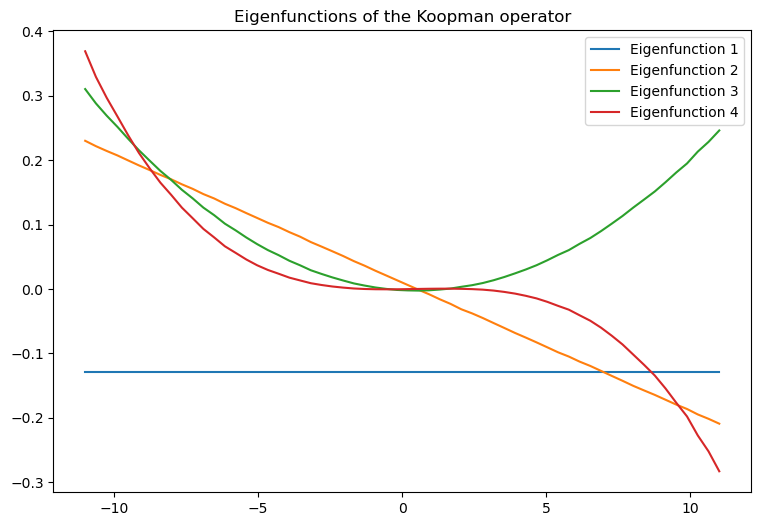

array([1.        +0.j, 0.6047869 +0.j, 0.36714802+0.j, 0.22026791+0.j])

In [ ]:
dataX=np.reshape(dataX,(1,500000))
dataY=np.reshape(dataY,(1,500000))

Algorithms_for_EDMD.find_eigenfunctions_eigenvalues_1D(dataX,dataY,oper='K',num_evs=4,xlima=-11,xlimb=11,num_boxes=60,sigma=0,num_mon=0
                                   ,type_of_basis='ind',plot_efunctions=True)
    